# Question 1

## 1.1 Prerequisite

umap-learn and scikit-learn-extra need to be installed.

In [1]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn-extra

  Using cached scikit-learn-extra-0.1.0b2.tar.gz (615 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp38-cp38-linux_x86_64.whl size=309636 sha256=2620400d6fd735dc6afed0e5ef88c66b3c125e813c80126be1a0a11baa57900b
  Stored in directory: /home/phant4/.cache/pip/wheels/d0/8c/9f/1ecfa0569bfea5262a1bb1ad873412e6466af3689147691a14
Successfully built scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sklearn
import umap

from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.cluster import (KMeans,
                             SpectralClustering,
                             AgglomerativeClustering,
                             Birch)
from sklearn.mixture import GaussianMixture
from texttable import Texttable

## 1.2 Analyze data

## 1.2.1 Determine number of clusters

In [4]:
data = pd.read_csv("genedata.csv") 

In [5]:
# Check for NaN data
print("Number of invalid data fields")
print(data.isna().sum())

Number of invalid data fields
id       0
class    0
f1       0
f2       0
f3       0
        ..
f6996    0
f6997    0
f6998    0
f6999    0
f7000    0
Length: 7002, dtype: int64


In [6]:
# Data preprocessing
data_without_label = data.drop(columns = ['id', 'class'])
print ("Dataset has {} samples with {} features each.".format(*data.shape))
data_without_label

Dataset has 795 samples with 7002 features each.


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f6991,f6992,f6993,f6994,f6995,f6996,f6997,f6998,f6999,f7000
0,4.8778,4.4118,9.0690,10.0966,11.1664,10.2457,8.2541,12.0844,6.8658,5.7480,...,11.4206,9.5440,8.5381,11.4735,10.1581,7.8083,8.7157,9.4212,9.9236,8.5223
1,8.9505,2.7079,10.0899,6.5899,9.5933,8.3250,9.9028,12.4863,7.5498,9.5101,...,13.0857,9.4303,11.0118,9.8609,8.9299,10.4229,10.5660,7.9997,9.9458,10.5250
2,4.7239,3.7181,9.2404,10.1070,10.0589,9.5977,8.3794,12.8728,8.8574,5.8791,...,8.2631,9.7016,7.7138,14.3444,9.2942,8.5537,8.7280,7.9019,11.4660,8.9878
3,7.6797,4.1321,9.3522,9.3646,10.2057,9.4130,8.8524,13.2288,9.2525,5.7487,...,10.7985,9.1055,8.4670,11.4066,10.0314,8.3365,9.1870,7.7253,10.1910,9.7299
4,6.1541,5.9960,9.5418,8.9614,9.6077,9.3430,9.9071,13.1981,8.8106,5.5387,...,12.2830,8.7680,9.1708,9.9139,9.4670,9.8127,9.2294,7.7958,9.2692,10.8166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,5.5051,5.5937,8.8036,9.8995,10.2081,7.0993,10.0181,13.7360,8.9059,6.4352,...,12.3530,9.2083,8.2600,10.0181,9.1594,9.1573,8.9010,7.5171,8.9912,10.5179
791,6.4445,6.3149,9.9281,5.7244,10.0598,8.3327,8.9625,12.7977,8.8633,7.3106,...,11.4967,9.3160,11.3185,9.7353,9.0437,9.8171,7.9135,8.8159,10.6293,10.6889
792,9.3204,8.1726,9.1752,9.9419,10.7564,9.7459,9.9507,12.5833,8.9300,7.8694,...,11.1193,9.0767,9.2110,10.0821,9.6255,10.9260,7.9507,7.5112,8.6089,10.1170
793,6.7255,5.5300,9.6569,9.7835,10.8310,9.3115,8.4064,12.3590,8.3744,6.3127,...,10.1283,9.3001,8.4043,10.9690,8.9199,9.2516,8.1096,8.3683,11.4727,9.8517


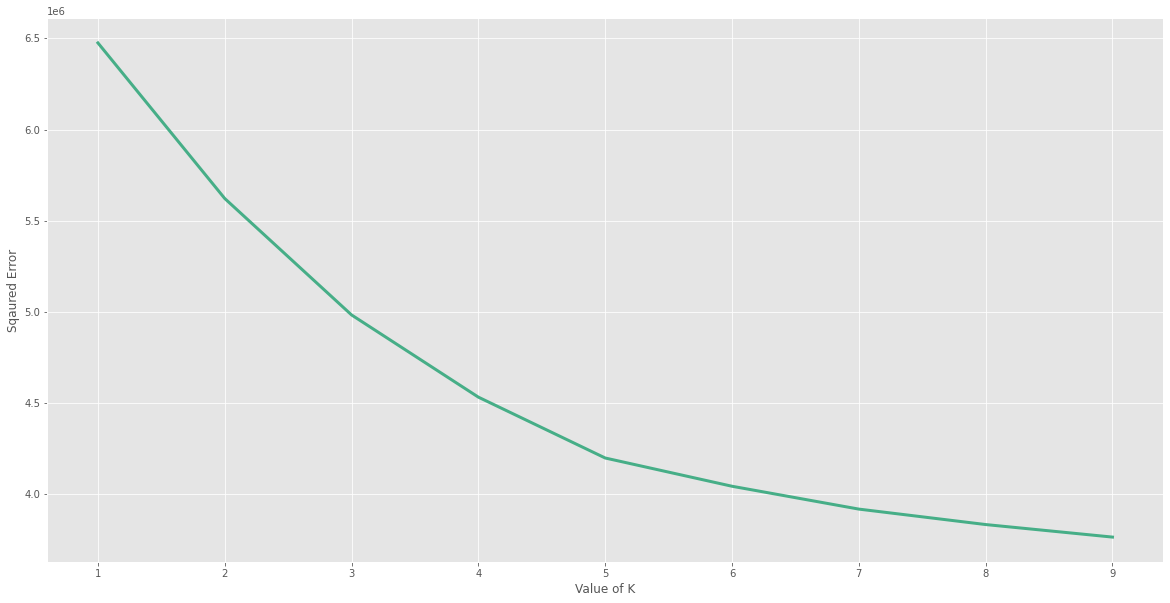

In [8]:
clusterPointError =[] 

for i in range(1, 10): 
    KM = KMeans(n_clusters = i, max_iter = 500, random_state=42)  
    KM.fit(data_without_label) 
      
    # calculates squared error for the clustered points 
    clusterPointError.append(KM.inertia_)      
    
fig,ax = plt.subplots(figsize=(20, 10))
plt.style.use('ggplot')
plt.plot(range(1, 10), clusterPointError, color ='#46AE87', linewidth ='3')
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error") 
plt.savefig('Q1_Elbow.png')
plt.show() # clear the plot 

## 1.2.2 Auxiliary functions 

In [13]:
# Set color for clusters
COLORS = { 0: '#AC96D2', 1: '#46AE87', 2: '#7498C4' , 3: '#F7655E', 4: '#F98519', 5: '#7024F2'}


def calculate_nmi_score(df, 
                        cluster_labels):
    """
    This function calculates NMI score
    arithmetic method is chosen as being instructed to compute the normalizer in the denominator
    :param df: orginal data which has class columns
    :param cluster_labels: labels generated by clustering methods
    :return: NMI score
    :rtype: float
    """
    return metrics.normalized_mutual_info_score(labels_true = data['class'].to_numpy(), 
                                                labels_pred = cluster_labels, 
                                                average_method = 'arithmetic')

def plot_cluster(x, 
                 y, 
                 labels, 
                 title):
    """
    This function plot a graph to illustrate the data in 2D.
    :param x: x coordinate
    :param y: y coordinate
    :param labels: labels of the points. Can be cluster labels or true labels
    :param title: graph title
    """
    
    c = [COLORS[l] for l in labels]
    
    fig = plt.figure(figsize = (10, 10))
    plt.style.use('ggplot')
    fig.suptitle(title, fontsize = 20)

    plt.scatter(x, y, c = c)
    plt.savefig(title + '.png')
    plt.show()   
        
def report_nmi_matrix_stats(score_matrix):
    """
    This function returns the highest score, the lowest score, the average score and the variance of the score.
    :param score_matrix: score matrix, which can be calculated by using generate_tsne_nmi_score_matrix or 
    generate_umap_nmi_score_matrix functions
    """
    print("Min Normalized Mutual Information", np.min(score_matrix))
    print("Max Normalized Mutual Information", np.max(score_matrix))
    print("Average Normalized Mutual Information", np.mean(score_matrix))
    print("Var Normalized Mutual Information", np.var(score_matrix))

## 1.2.3 Naive approach

In [18]:
naive_kmeans_labels = KMeans(n_clusters=5, 
                      random_state=42, 
                      init='k-means++'
                     ).fit_predict(data_without_label)

print("NMI for K-Means without configuring params")
print(calculate_nmi_score(data, naive_kmeans_labels))

naive_spectral_labels = SpectralClustering(n_clusters=5, 
                                           random_state=42,
                                           affinity = 'nearest_neighbors'
                                          ).fit_predict(data_without_label)

print("NMI for Spectral Clustering without configuring params")
print(calculate_nmi_score(data, naive_spectral_labels))

NMI for K-Means without configuring params
0.8545700274422968
NMI for Spectral Clustering without configuring params
0.9800707156311371


## 1.3 Clustering

### 1.3.1 T-SNE Technique

In [20]:
def generate_tsne_embedding(df, 
                            perplexity_range = [i*5 for i in range(1, 11)],
                            metric='cityblock',
                            random_state = 42):
    """
    This function performs nonlinear dimensionality reduction on given high-dimensional data
    :param df: high-dimensional data
    :param perplexity_range: perplexity range which needs to be looped through
    :param metric: metric to be used for t-SNE
    :param random_state: for reproducibility
    :return: 1D embedding of data represented in 2D
    """
    embedding = []
    
    for perplexity in perplexity_range:

        fit = TSNE(method = 'exact',
                   metric = metric,
                   perplexity = perplexity,
                   random_state = random_state)
            
        embedding_perplexity = fit.fit_transform(df)
        embedding.append(embedding_perplexity)

    return embedding

def generate_tsne_nmi_score_matrix(embeddings,
                                   cluster):
    """
    This function calculates NMI score
    :param embeddings: is generated by calling function generate_tsne_embedding
    :param cluster: clustering method. For example KMeans()
    :return: scores represented in 1D
    """
    
    scores = []
    perplexity_range = range(0, len(embeddings))
    
    for perplexity in perplexity_range: 
        
        labels = cluster.fit_predict(embeddings[perplexity])
        score_perplexity = calculate_nmi_score(data, labels)
        scores.append(score_perplexity)
        
    return scores

def generate_tsne_pcolor_plot(scores,  
                              title,
                              X = [i*5 for i in range(1, 11)]):
    
    """
    This function plots pcolor figures
    :param scores: is generated by calling function generate_tsne_nmi_score_matrix
    :param title: graph title
    :param X: must be similar to perplexity_range in function generate_tsne_embedding
    """

    fig,ax = plt.subplots(figsize=(20, 10))
    fig.suptitle(title, fontsize = 20)
    plt.pcolor([scores], cmap=plt.cm.OrRd, vmin = 0.5, vmax = 1)

    ax.set_xticks(np.arange(len(X))+0.5)
    ax.set_xticklabels(X)
    
    ax.set_yticks(np.arange(1)+0.5)
    ax.set_yticklabels([""])

    plt.colorbar()
    plt.show()

### 1.3.1.1 Score matrix

In [21]:
# This task will be time-consuming. ETC: 10 minutes. Code from section 1.3.1.2 can be run without running this.
embedding_tsne_cityblock = generate_tsne_embedding(data_without_label, metric = 'cityblock')

#### Agglomerative 

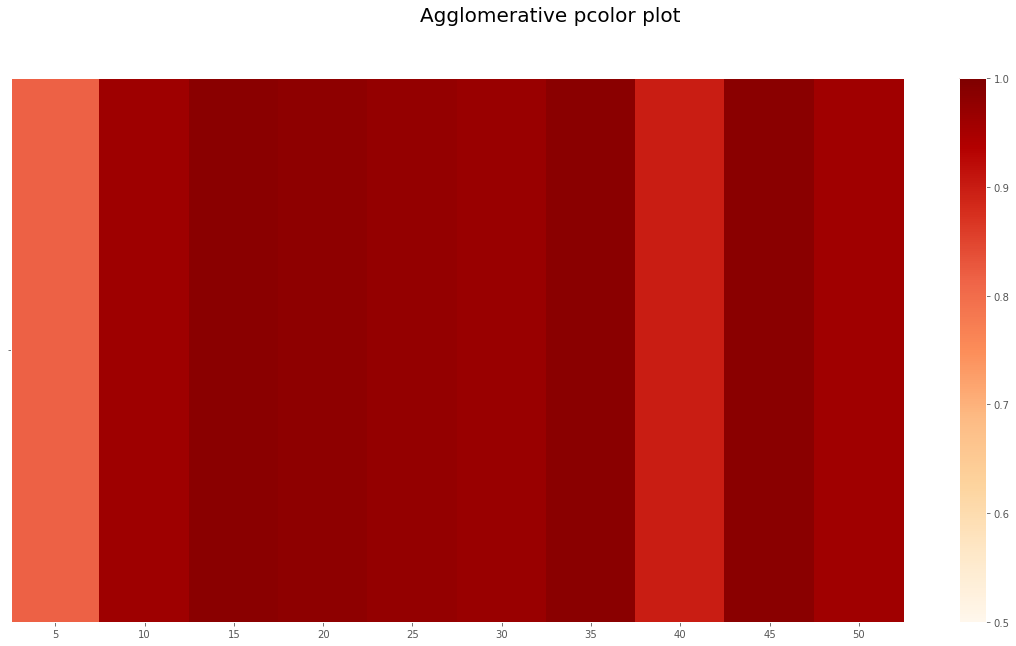

Min Normalized Mutual Information 0.8179162573444213
Max Normalized Mutual Information 0.9859430697668226
Average Normalized Mutual Information 0.9519165544711894
Var Normalized Mutual Information 0.0025860627418318976


In [11]:
agglomerative_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = AgglomerativeClustering(n_clusters=5, linkage='ward'))

generate_tsne_pcolor_plot(scores = agglomerative_tsne_cityblock_score, 
                          title = "Agglomerative pcolor plot")
report_nmi_matrix_stats(agglomerative_tsne_cityblock_score)

#### Birch

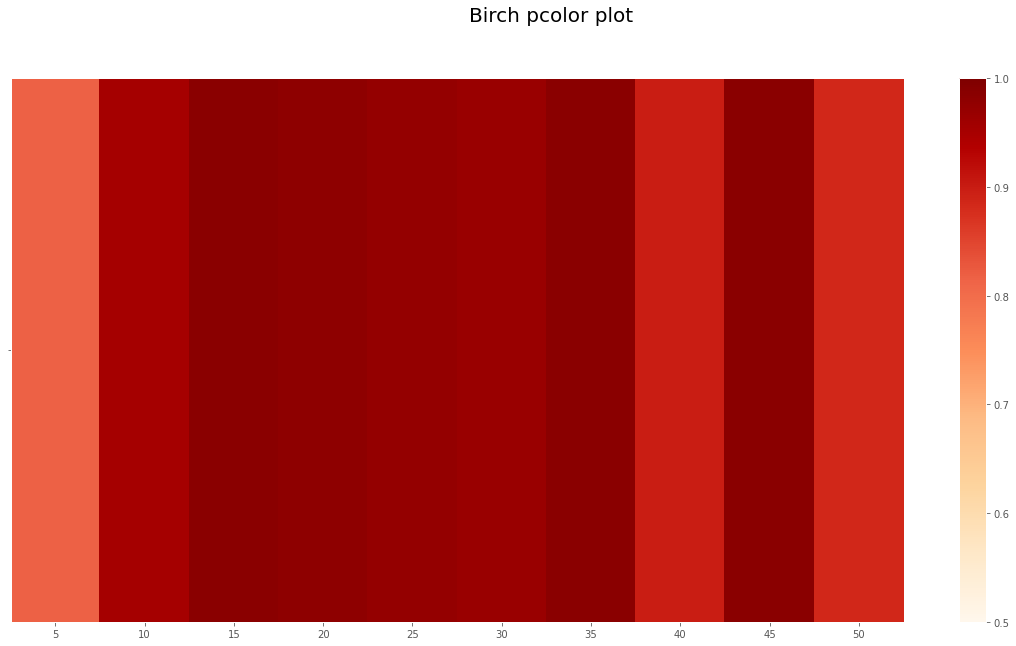

Min Normalized Mutual Information 0.8179162573444213
Max Normalized Mutual Information 0.9859430697668226
Average Normalized Mutual Information 0.9438433885941284
Var Normalized Mutual Information 0.002937967025196153


In [12]:
birch_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = Birch(n_clusters=5, threshold=0.1))

generate_tsne_pcolor_plot(scores = birch_tsne_cityblock_score, 
                          title = "Birch pcolor plot")
report_nmi_matrix_stats(birch_tsne_cityblock_score)

#### Gaussian Mixture

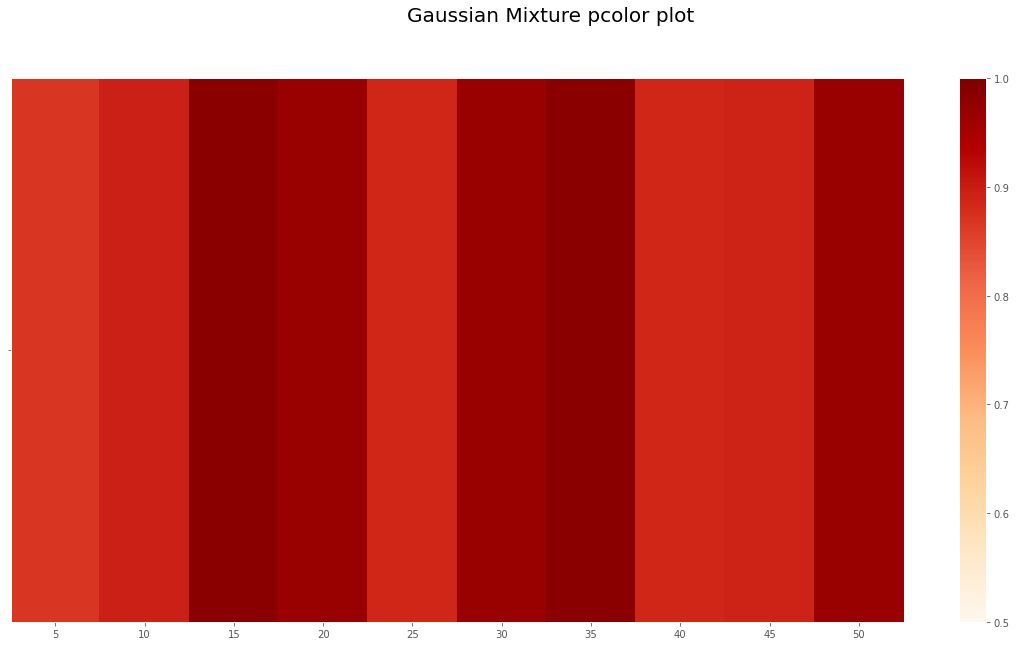

Min Normalized Mutual Information 0.8680314524720484
Max Normalized Mutual Information 0.9859430697668226
Average Normalized Mutual Information 0.9305446564856714
Var Normalized Mutual Information 0.002085473585676822


In [13]:
gaussian_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = GaussianMixture(n_components =5, 
                              covariance_type =  'full',
                              tol=1e-4,
                              max_iter=200,
                              n_init = 5))

generate_tsne_pcolor_plot(scores = gaussian_tsne_cityblock_score, 
                          title = "Gaussian Mixture pcolor plot")
report_nmi_matrix_stats(gaussian_tsne_cityblock_score)

#### K-Means

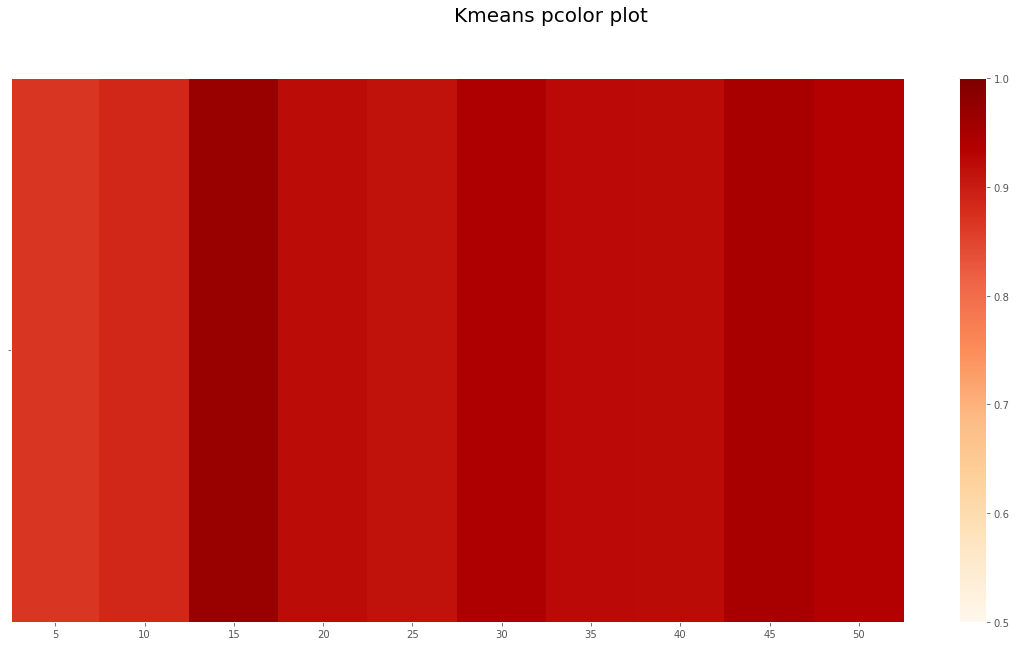

Min Normalized Mutual Information 0.8680314524720482
Max Normalized Mutual Information 0.9675159129495144
Average Normalized Mutual Information 0.9232538128600639
Var Normalized Mutual Information 0.0007822457171007505


In [14]:
kmeans_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = KMeans(n_clusters=5, random_state=42, init='k-means++'))

generate_tsne_pcolor_plot(scores = kmeans_tsne_cityblock_score, 
                     title = "Kmeans pcolor plot")
report_nmi_matrix_stats(kmeans_tsne_cityblock_score)

#### Spectral

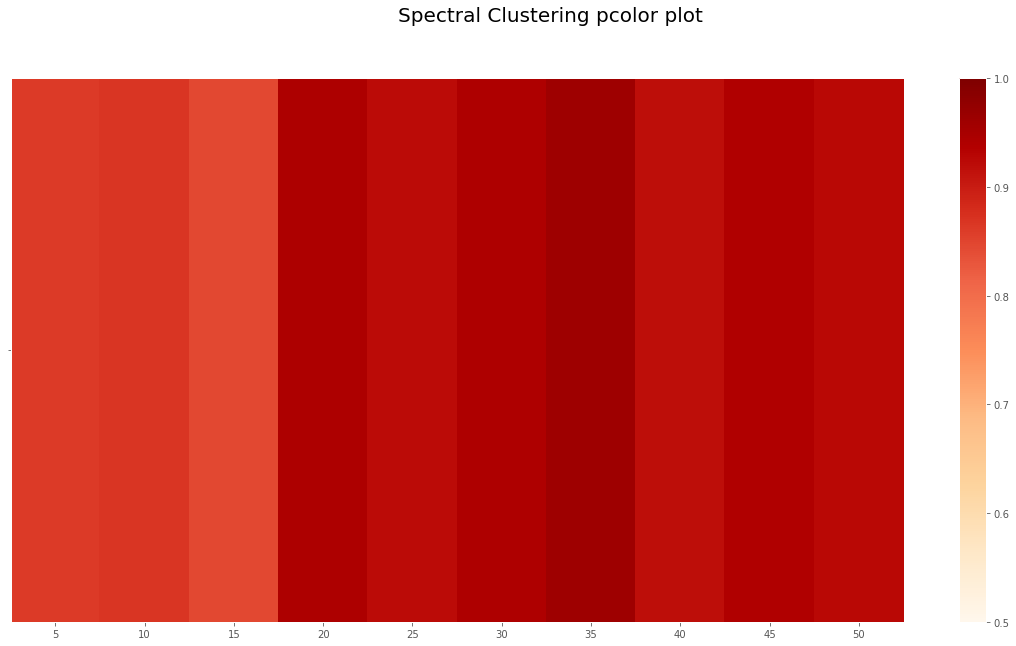

Min Normalized Mutual Information 0.8461421476634258
Max Normalized Mutual Information 0.9611133801367441
Average Normalized Mutual Information 0.9131177168796698
Var Normalized Mutual Information 0.0014425707265860452


In [29]:
spectral_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = SpectralClustering(n_clusters=5, 
                                 random_state=42, affinity = 'nearest_neighbors', n_neighbors=115))

generate_tsne_pcolor_plot(scores = spectral_tsne_cityblock_score, 
                          title = "Spectral Clustering pcolor plot")
report_nmi_matrix_stats(spectral_tsne_cityblock_score)

### Clustering Visualization

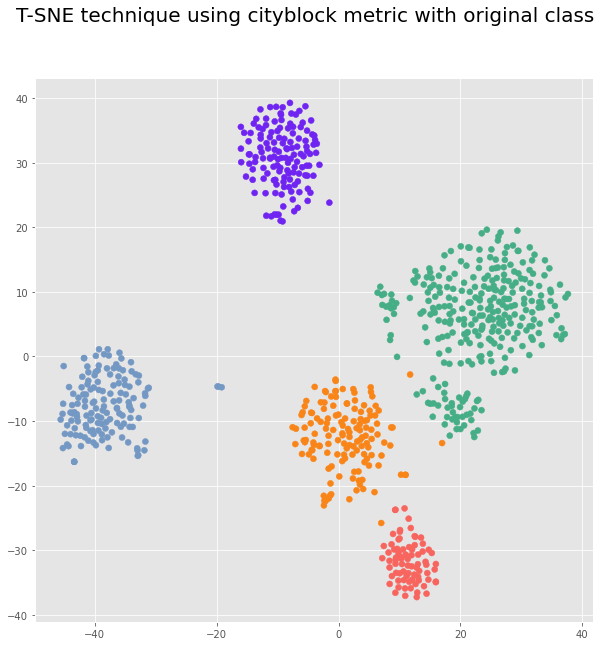

In [16]:
optimal_tsne_cityblock_fit = TSNE(method = 'exact', 
                                  metric = 'cityblock',
                                  perplexity = 45, 
                                  random_state = 42)

optimal_tsne_cityblock_embedding = optimal_tsne_cityblock_fit.fit_transform(data_without_label)

plot_cluster(optimal_tsne_cityblock_embedding[:, 0], 
             optimal_tsne_cityblock_embedding[:, 1], 
             data["class"], 
             'T-SNE technique using cityblock metric with original class')

### 1.3.1.2 Agglomerative clustering method

In [17]:
optimal_tsne_cityblock_fit_agg = TSNE(method = 'exact', 
                                  metric = 'cityblock',
                                  perplexity = 15, 
                                  random_state = 42)

optimal_tsne_cityblock_embedding_agg = optimal_tsne_cityblock_fit.fit_transform(data_without_label)


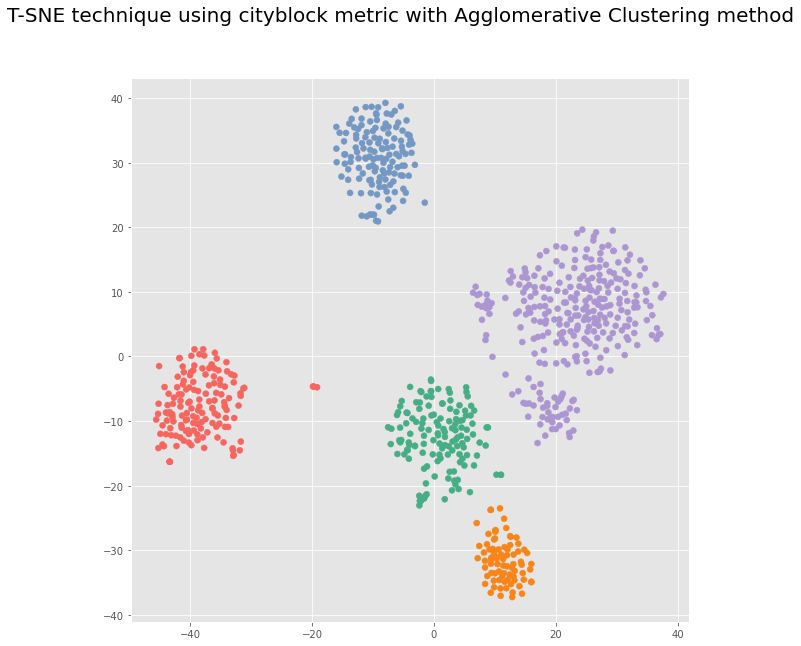

NMI for T-SNE technique using cityblock metric with Agglomerative Clustering method
0.9859430697668226


In [18]:
optimal_tsne_cityblock_agglomerative_labels = AgglomerativeClustering(n_clusters=5, 
                                                                      linkage='ward').fit_predict(optimal_tsne_cityblock_embedding_agg)

plot_cluster(optimal_tsne_cityblock_embedding_agg[:, 0], 
             optimal_tsne_cityblock_embedding_agg[:, 1], 
             optimal_tsne_cityblock_agglomerative_labels, 
             'T-SNE technique using cityblock metric with Agglomerative Clustering method')
print("NMI for T-SNE technique using cityblock metric with Agglomerative Clustering method")
print(calculate_nmi_score(data, optimal_tsne_cityblock_agglomerative_labels))

### 1.3.1.3 Birch method

In [19]:
optimal_tsne_cityblock_fit_birch = TSNE(method = 'exact', 
                                            metric = 'cityblock',
                                            perplexity = 15, 
                                            random_state = 42)

optimal_tsne_cityblock_embedding_birch = optimal_tsne_cityblock_fit_birch.fit_transform(data_without_label)

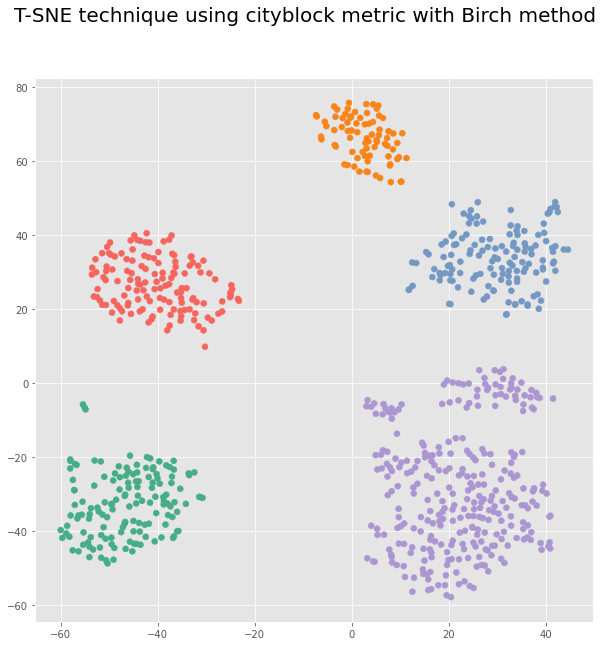

NMI for T-SNE technique using cityblock metric with Birch method
0.9859430697668226


In [21]:
optimal_tsne_cityblock_birch_labels = Birch(n_clusters=5, 
                                            threshold=0.1).fit_predict(optimal_tsne_cityblock_embedding_birch)

plot_cluster(optimal_tsne_cityblock_embedding_birch[:, 0], 
             optimal_tsne_cityblock_embedding_birch[:, 1], 
             optimal_tsne_cityblock_birch_labels, 
             'T-SNE technique using cityblock metric with Birch method')
print("NMI for T-SNE technique using cityblock metric with Birch method")
print(calculate_nmi_score(data, optimal_tsne_cityblock_birch_labels))

### 1.3.1.4 Gaussian Mixture method

In [27]:
optimal_tsne_cityblock_fit_gaussian = TSNE(method = 'exact', 
                                            metric = 'cityblock',
                                            perplexity = 35, 
                                            random_state = 42)

optimal_tsne_cityblock_embedding_gaussian = optimal_tsne_cityblock_fit_gaussian.fit_transform(data_without_label)

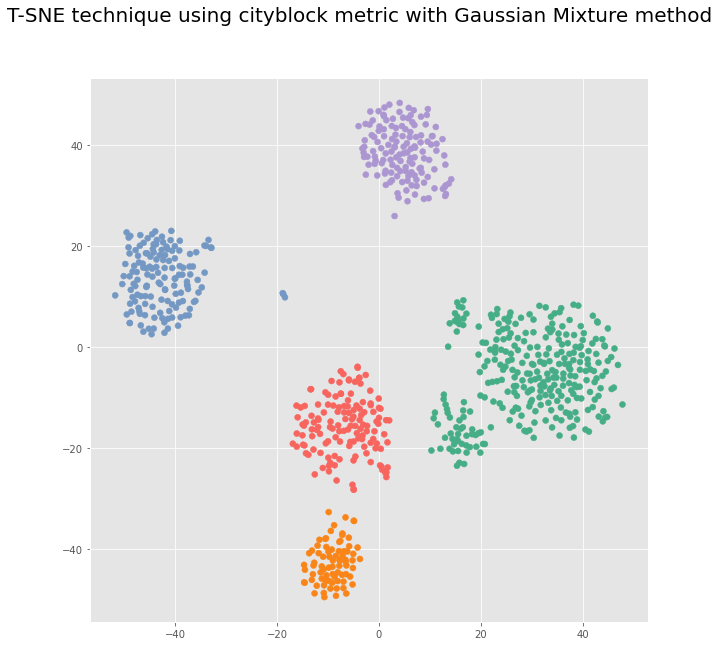

NMI for T-SNE technique using cityblock metric with Gaussian Mixture method
0.9859430697668226


In [28]:
optimal_tsne_cityblock_gaussian_labels = GaussianMixture(n_components =5,
                                                         tol=1e-3).fit_predict(optimal_tsne_cityblock_embedding_gaussian)

plot_cluster(optimal_tsne_cityblock_embedding_gaussian[:, 0], 
             optimal_tsne_cityblock_embedding_gaussian[:, 1], 
             optimal_tsne_cityblock_gaussian_labels, 
             'T-SNE technique using cityblock metric with Gaussian Mixture method')
print("NMI for T-SNE technique using cityblock metric with Gaussian Mixture method")
print(calculate_nmi_score(data, optimal_tsne_cityblock_gaussian_labels))

### 1.3.1.5 K-Means method

In [29]:
optimal_tsne_cityblock_fit_kmeans = TSNE(method = 'exact', 
                                            metric = 'cityblock',
                                            perplexity = 15, 
                                            random_state = 42)

optimal_tsne_cityblock_embedding_kmeans = optimal_tsne_cityblock_fit_kmeans.fit_transform(data_without_label)

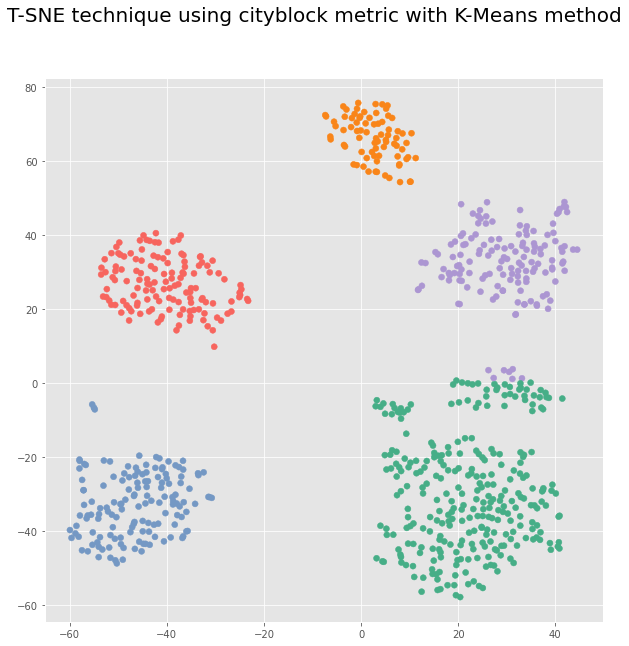

NMI for T-SNE technique using cityblock metric with K-Means method
0.9675159129495144


In [30]:
optimal_tsne_cityblock_k_means_labels = KMeans(n_clusters=5, 
                                               tol=1e-5,
                                               random_state=42, 
                                               init='k-means++').fit_predict(optimal_tsne_cityblock_embedding_kmeans)

plot_cluster(optimal_tsne_cityblock_embedding_kmeans[:, 0], 
             optimal_tsne_cityblock_embedding_kmeans[:, 1], 
             optimal_tsne_cityblock_k_means_labels, 
             'T-SNE technique using cityblock metric with K-Means method')
print("NMI for T-SNE technique using cityblock metric with K-Means method")
print(calculate_nmi_score(data, optimal_tsne_cityblock_k_means_labels))

### 1.3.1.6 Spectral Clustering method

In [30]:
optimal_tsne_cityblock_fit_spectral = TSNE(method = 'exact', 
                                            metric = 'cityblock',
                                            perplexity = 35, 
                                            random_state = 42)

optimal_tsne_cityblock_embedding_spectral = optimal_tsne_cityblock_fit_spectral.fit_transform(data_without_label)

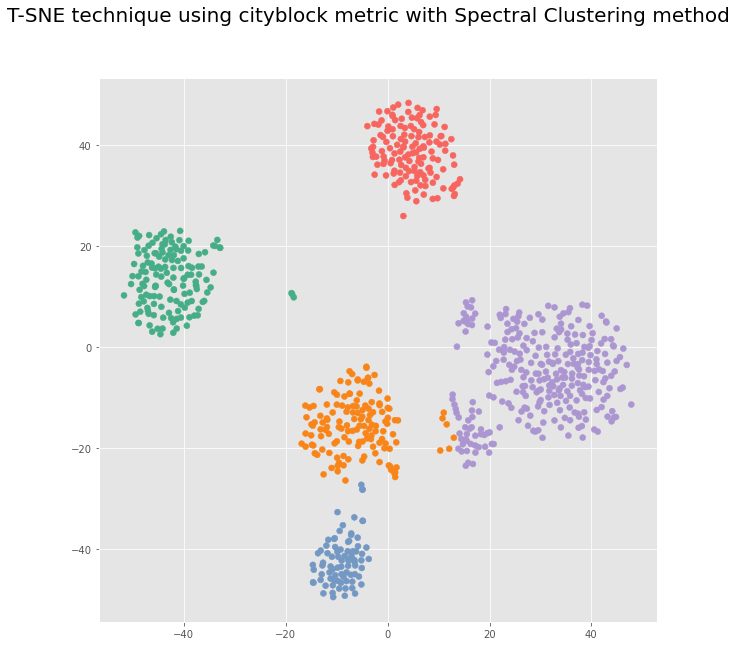

NMI for T-SNE technique using cityblock metric with Spectral Clustering method
0.9611133801367441


In [31]:
optimal_tsne_cityblock_spectral_labels = SpectralClustering(n_clusters=5,
                                                            random_state=42, affinity = 'nearest_neighbors', n_neighbors=115).fit_predict(optimal_tsne_cityblock_embedding_spectral)

plot_cluster(optimal_tsne_cityblock_embedding_spectral[:, 0], 
             optimal_tsne_cityblock_embedding_spectral[:, 1], 
             optimal_tsne_cityblock_spectral_labels, 
             'T-SNE technique using cityblock metric with Spectral Clustering method')
print("NMI for T-SNE technique using cityblock metric with Spectral Clustering method")
print(calculate_nmi_score(data, optimal_tsne_cityblock_spectral_labels))

### 1.3.1.7 Normalized Mutual Information Values Comparision

In [34]:
table = Texttable()

table.add_row(['Method','Normalized Mutual Information'])
table.add_row(["Agglomerative clustering", calculate_nmi_score(data, optimal_tsne_cityblock_agglomerative_labels)])
table.add_row(["Birch", calculate_nmi_score(data, optimal_tsne_cityblock_birch_labels)])
table.add_row(["Gaussian Mixture", calculate_nmi_score(data, optimal_tsne_cityblock_gaussian_labels)])
table.add_row(["K-Means", calculate_nmi_score(data, optimal_tsne_cityblock_k_means_labels)])
table.add_row(["Spectral Clustering", calculate_nmi_score(data, optimal_tsne_cityblock_spectral_labels)])

print(table.draw())

+--------------------------+-------------------------------+
| Method                   | Normalized Mutual Information |
+--------------------------+-------------------------------+
| Agglomerative clustering | 0.986                         |
+--------------------------+-------------------------------+
| Birch                    | 0.986                         |
+--------------------------+-------------------------------+
| Gaussian Mixture         | 0.986                         |
+--------------------------+-------------------------------+
| K-Means                  | 0.968                         |
+--------------------------+-------------------------------+
| Spectral Clustering      | 0.961                         |
+--------------------------+-------------------------------+


## 1.3.2 UMAP

In [9]:
def generate_umap_embedding(df,  
                            dist_range = [round(i* 0.05, 2) for i in range(1, 21)],
                            neighbor_range = [i * 5 for i in range(1, 21)],
                            random_state = 42):
    embedding = []
    
    for dist in dist_range:
        embedding_dist = []
        
        for neighbor in neighbor_range:
            
            fit = umap.UMAP(
                metric = 'canberra',
                min_dist = dist,
                n_neighbors = neighbor,
                random_state = random_state)
            
            embedding_neighbor = fit.fit_transform(df)
            embedding_dist.append(embedding_neighbor)
            
        embedding.append(embedding_dist)

    return embedding

def generate_umap_nmi_score_matrix(embeddings,
                                   cluster):
    score = []
    dist_range = range(0, len(embeddings))
    neighbor_range = range(0, len(embeddings[0]))
    
    for dist in dist_range:
        score_dist = []
        
        for neighbor in neighbor_range:
            
            labels = cluster.fit_predict(embeddings[dist][neighbor])
            score_neighbor = calculate_nmi_score(data, labels)
            score_dist.append(score_neighbor)
        score.append(score_dist)  
    return score

def generate_umap_pcolor_plot(scores,  
                              title,
                              X = [i * 5 for i in range(1, 21)],
                              Y = [round(i* 0.05,2) for i in range(1, 21)]):

    fig,ax = plt.subplots(figsize=(20, 10))
    fig.suptitle(title, fontsize = 20)
    plt.pcolor(scores, cmap=plt.cm.OrRd, vmin = 0.5, vmax = 1)

    ax.set_yticks(np.arange(len(Y))+0.5)
    ax.set_yticklabels(Y)

    ax.set_xticks(np.arange(len(X))+0.5)
    ax.set_xticklabels(X)

    plt.colorbar()
    plt.show()
    
def get_optimal_dist_and_neighbor(scores):
    possition = np.where(scores == np.max(scores))
    return [round((possition[0][0] +1)*0.05 , 2), (possition[1][0] + 1)*5]

### 1.3.2.1 Score matrix 

In [10]:
# This task will be time-consuming. ETC: 120 minutes. Code from section 1.3.2.2 can be run without running this.
embedding_umap_canberra = generate_umap_embedding(data_without_label)

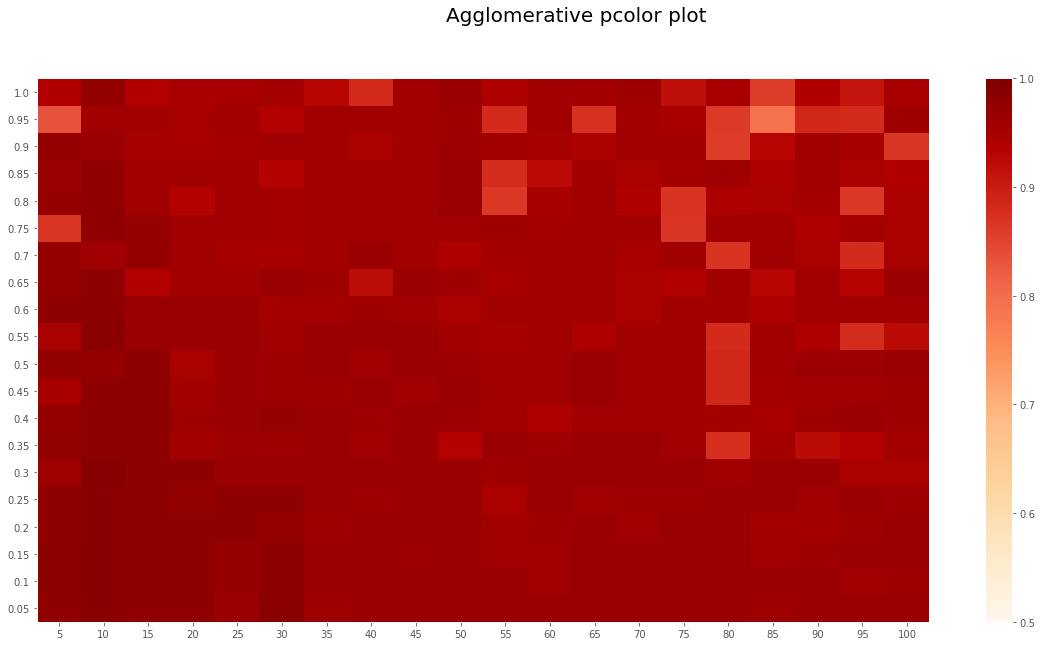

Min Normalized Mutual Information 0.7898952464999726
Max Normalized Mutual Information 0.9894925577596821
Average Normalized Mutual Information 0.955180353150941
Var Normalized Mutual Information 0.0006291007119182682


In [12]:
agglomerative_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = AgglomerativeClustering(n_clusters=5, linkage='ward'))

generate_umap_pcolor_plot(scores = agglomerative_umap_canberra_score, 
                          title = "Agglomerative pcolor plot")
report_nmi_matrix_stats(agglomerative_umap_canberra_score)

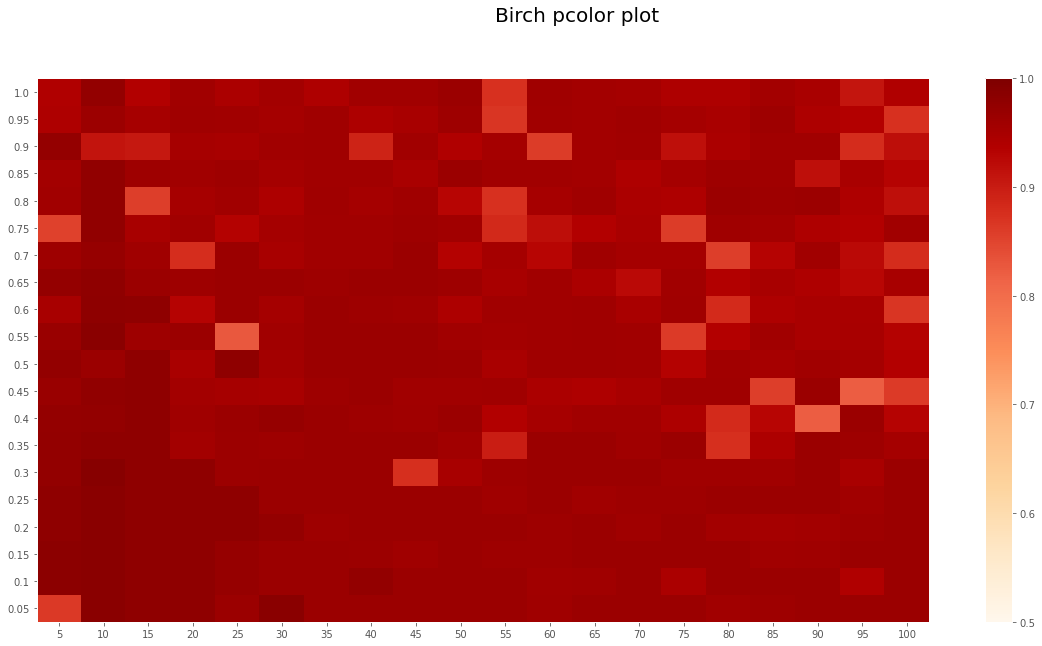

Min Normalized Mutual Information 0.8209968159343392
Max Normalized Mutual Information 0.9894925577596821
Average Normalized Mutual Information 0.9527627253824212
Var Normalized Mutual Information 0.0007277400853349042


In [13]:
birch_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = Birch(n_clusters=5, threshold=0.1))

generate_umap_pcolor_plot(scores = birch_umap_canberra_score, 
                          title = "Birch pcolor plot")
report_nmi_matrix_stats(birch_umap_canberra_score)

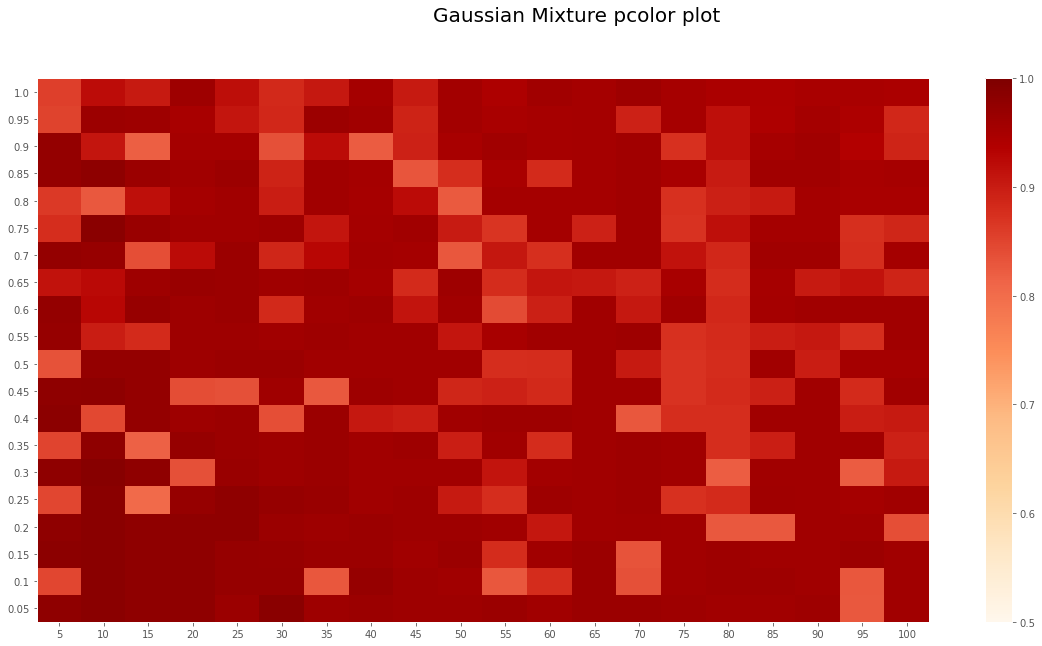

Min Normalized Mutual Information 0.8031226357720394
Max Normalized Mutual Information 0.9894925577596824
Average Normalized Mutual Information 0.933049524296099
Var Normalized Mutual Information 0.0019194204000254208


In [14]:
gaussian_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = GaussianMixture(n_components =5, tol=1e-4))

generate_umap_pcolor_plot(scores = gaussian_umap_canberra_score, 
                          title = "Gaussian Mixture pcolor plot")
report_nmi_matrix_stats(gaussian_umap_canberra_score)

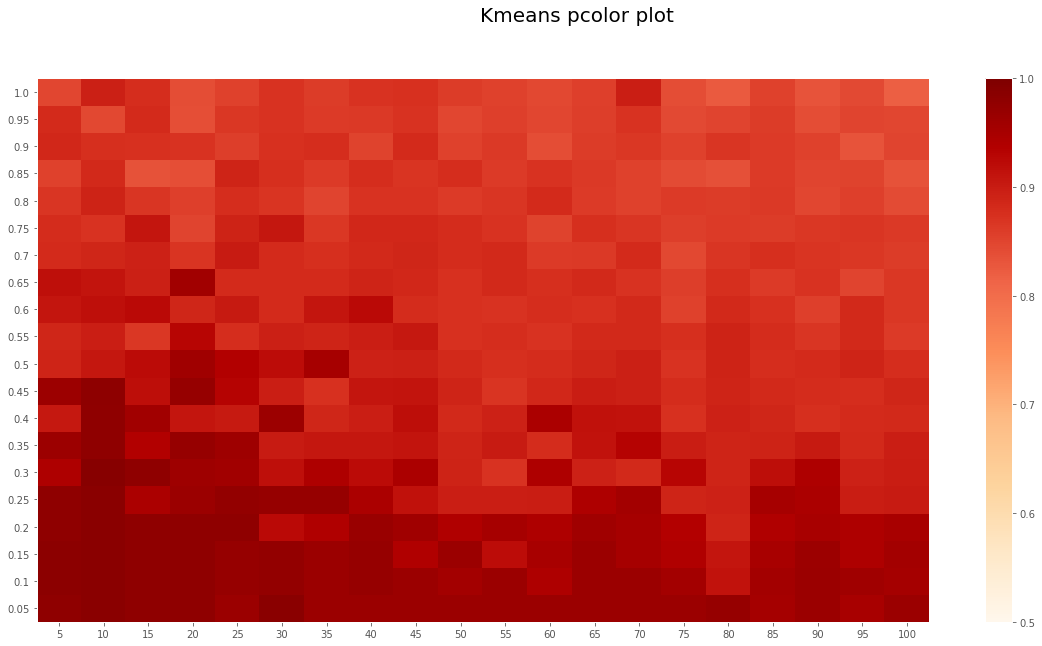

Min Normalized Mutual Information 0.819899937038077
Max Normalized Mutual Information 0.9894925577596821
Average Normalized Mutual Information 0.9021653066981196
Var Normalized Mutual Information 0.0018249050004190731


In [15]:
kmeans_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = KMeans(n_clusters=5, random_state=42, init='k-means++'))

generate_umap_pcolor_plot(scores = kmeans_umap_canberra_score, 
                          title = "Kmeans pcolor plot")
report_nmi_matrix_stats(kmeans_umap_canberra_score)

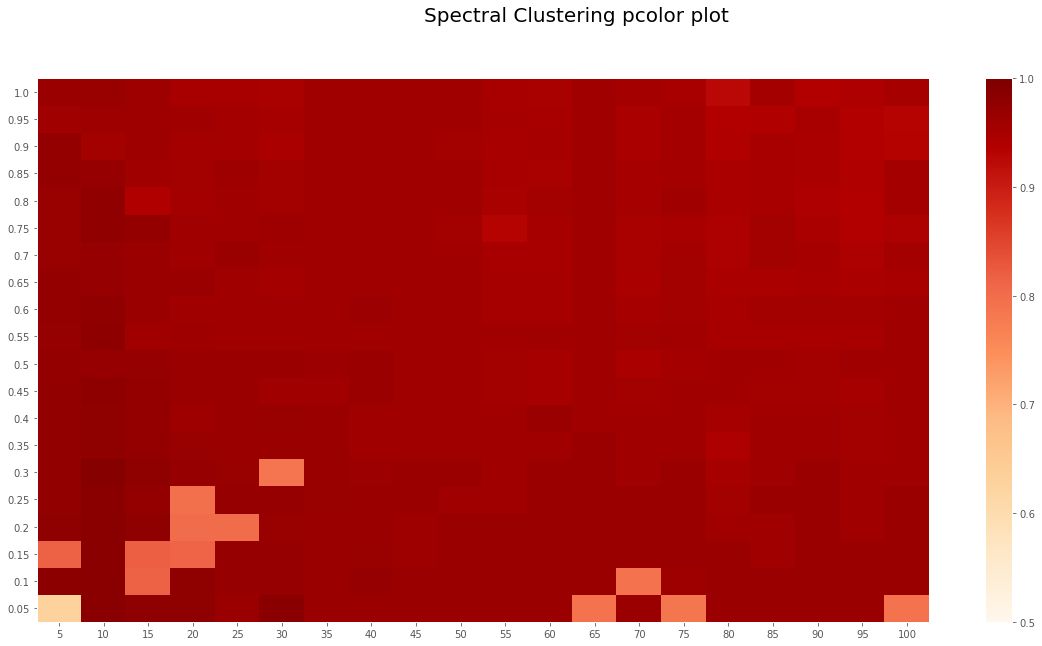

Min Normalized Mutual Information 0.6307527469154796
Max Normalized Mutual Information 0.9894925577596824
Average Normalized Mutual Information 0.9546506680019499
Var Normalized Mutual Information 0.001089655528343222


In [16]:
spectral_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = SpectralClustering(n_clusters=5, 
                                 random_state=42))

generate_umap_pcolor_plot(scores = spectral_umap_canberra_score, 
                          title = "Spectral Clustering pcolor plot")
report_nmi_matrix_stats(spectral_umap_canberra_score)

### Original class clustering

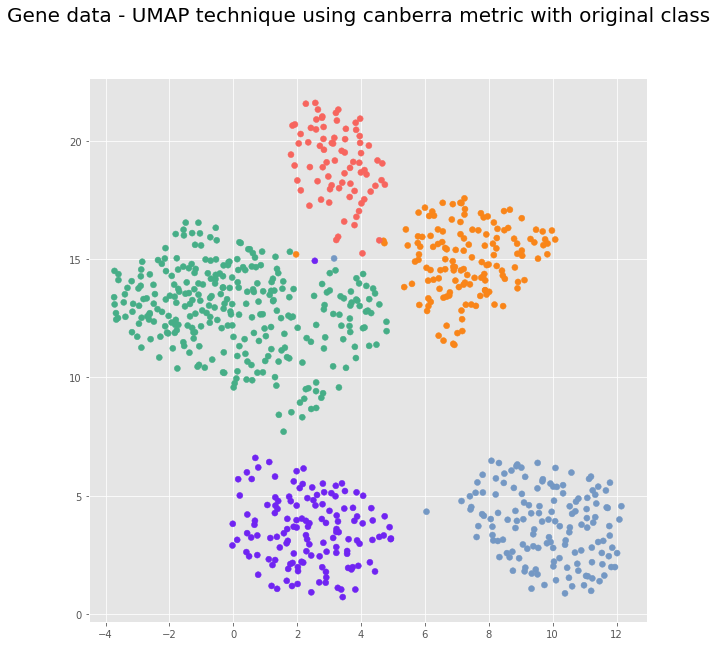

In [17]:
optimal_umap_canberra_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 1, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra__embedding = optimal_umap_canberra_fit.fit_transform(data_without_label)

plot_cluster(optimal_umap_canberra__embedding[:, 0], 
             optimal_umap_canberra__embedding[:, 1], 
             data["class"], 
             'Gene data - UMAP technique using canberra metric with original class')

### 1.3.2.2 Agglomerative clustering method

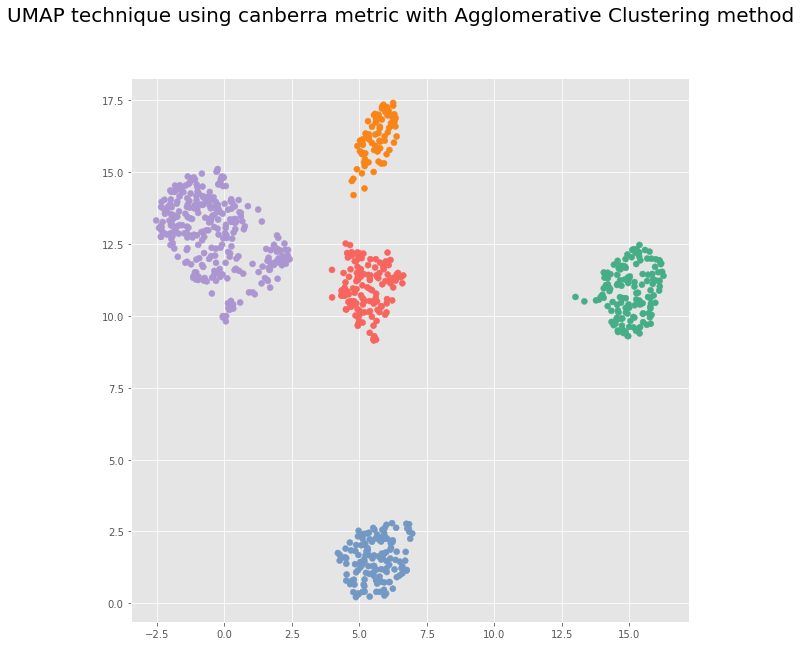

UMAP technique using canberra metric with Agglomerative Clustering method
0.9894925577596821


In [18]:
optimal_umap_canberra_agglomerative_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 0.3, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra_for_agglomerative_embedding = optimal_umap_canberra_agglomerative_fit.fit_transform(data_without_label)


optimal_umap_canberra_agglomerative_labels = AgglomerativeClustering(n_clusters=5, 
                                                                      linkage='ward').fit_predict(optimal_umap_canberra_for_agglomerative_embedding)

plot_cluster(optimal_umap_canberra_for_agglomerative_embedding[:, 0],
             optimal_umap_canberra_for_agglomerative_embedding[:, 1], 
             optimal_umap_canberra_agglomerative_labels, 
             'UMAP technique using canberra metric with Agglomerative Clustering method')
print("UMAP technique using canberra metric with Agglomerative Clustering method")
print(calculate_nmi_score(data, optimal_umap_canberra_agglomerative_labels))

### 1.3.2.3 Birch method

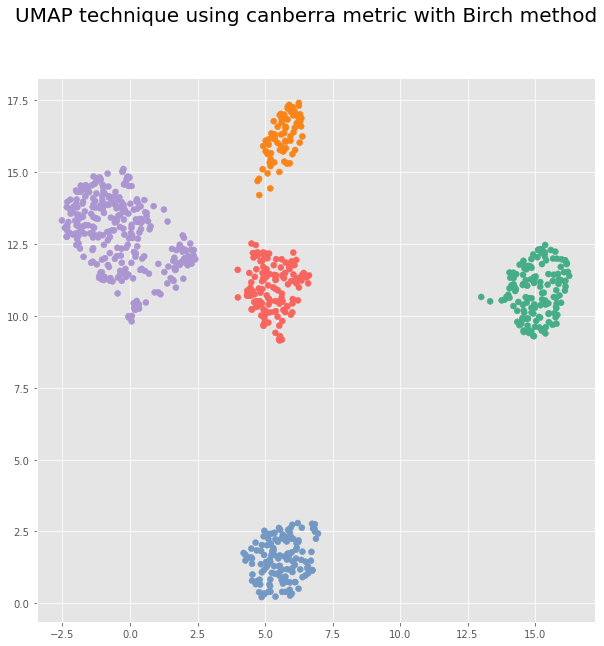

UMAP technique using canberra metric with Birch method
0.9894925577596821


In [19]:
optimal_umap_canberra_birch_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 0.3, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra_for_birch_embedding = optimal_umap_canberra_birch_fit.fit_transform(data_without_label)


optimal_umap_canberra_for_birch_labels =  Birch(n_clusters=5, threshold=0.1).fit_predict(optimal_umap_canberra_for_birch_embedding)

plot_cluster(optimal_umap_canberra_for_birch_embedding[:, 0],
             optimal_umap_canberra_for_birch_embedding[:, 1], 
             optimal_umap_canberra_for_birch_labels, 
             'UMAP technique using canberra metric with Birch method')
print("UMAP technique using canberra metric with Birch method")
print(calculate_nmi_score(data, optimal_umap_canberra_for_birch_labels))

### 1.3.2.4 Gaussian Mixture method

In [23]:
for n in range (1, 30):
    if n%5 == 0: 
        optimal_umap_canberra_gaussian_fit = umap.UMAP( metric = 'canberra', 
                                           min_dist = 0.3, 
                                           n_neighbors = n, 
                                           random_state = 42)

        optimal_umap_canberra_for_gaussian_embedding = optimal_umap_canberra_gaussian_fit.fit_transform(data_without_label)


        optimal_umap_canberra_for_gaussian_labels =  GaussianMixture(n_components =5, 
                                                                 tol=1e-4).fit_predict(optimal_umap_canberra_for_gaussian_embedding)
        print(calculate_nmi_score(data, optimal_umap_canberra_for_gaussian_labels))

0.9795135990661036
0.9894925577596821
0.9792753465326189
0.9745722130329746
0.9682280136655118


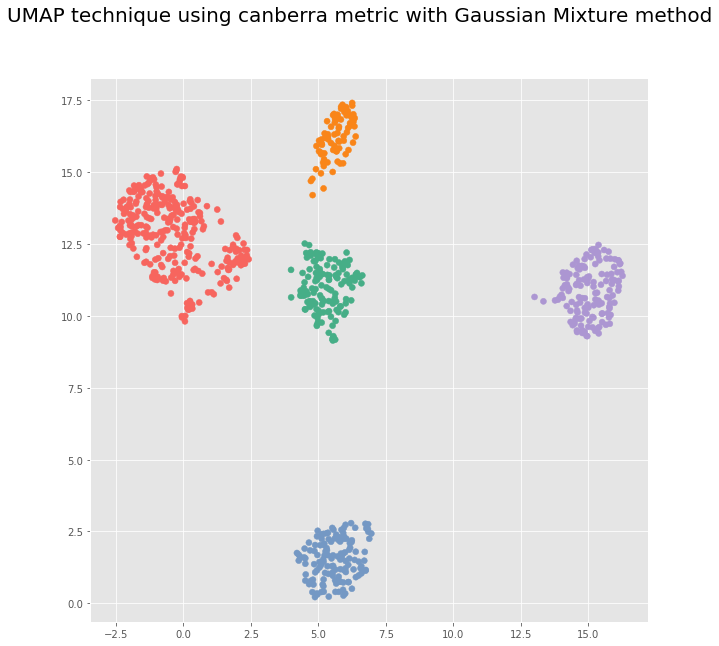

UMAP technique using canberra metric with Gaussian Mixture method
0.9894925577596824


In [24]:
optimal_umap_canberra_gaussian_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 0.3, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra_for_gaussian_embedding = optimal_umap_canberra_gaussian_fit.fit_transform(data_without_label)


optimal_umap_canberra_for_gaussian_labels =  GaussianMixture(n_components =5, 
                                                             tol=1e-4).fit_predict(optimal_umap_canberra_for_gaussian_embedding)

plot_cluster(optimal_umap_canberra_for_gaussian_embedding[:, 0],
             optimal_umap_canberra_for_gaussian_embedding[:, 1], 
             optimal_umap_canberra_for_gaussian_labels, 
             'UMAP technique using canberra metric with Gaussian Mixture method')
print("UMAP technique using canberra metric with Gaussian Mixture method")
print(calculate_nmi_score(data, optimal_umap_canberra_for_gaussian_labels))

### 1.3.2.5 K-Means method

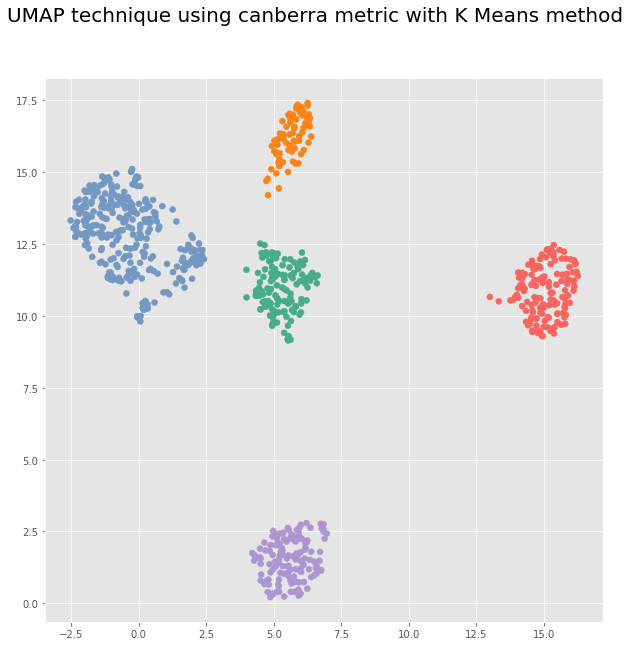

UMAP technique using canberra metric with K Means method
0.9894925577596821


In [34]:
optimal_umap_canberra_k_means_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 0.3, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra_for_k_means_embedding = optimal_umap_canberra_k_means_fit.fit_transform(data_without_label)


optimal_umap_canberra_for_k_means_labels =  KMeans(n_clusters=5, random_state=42, init='k-means++').fit_predict(optimal_umap_canberra_for_k_means_embedding)

plot_cluster(optimal_umap_canberra_for_k_means_embedding[:, 0],
             optimal_umap_canberra_for_k_means_embedding[:, 1], 
             optimal_umap_canberra_for_k_means_labels, 
             'UMAP technique using canberra metric with K Means method')
print("UMAP technique using canberra metric with K Means method")
print(calculate_nmi_score(data, optimal_umap_canberra_for_k_means_labels))

### 2.3.2.6 Spectral Clustering method

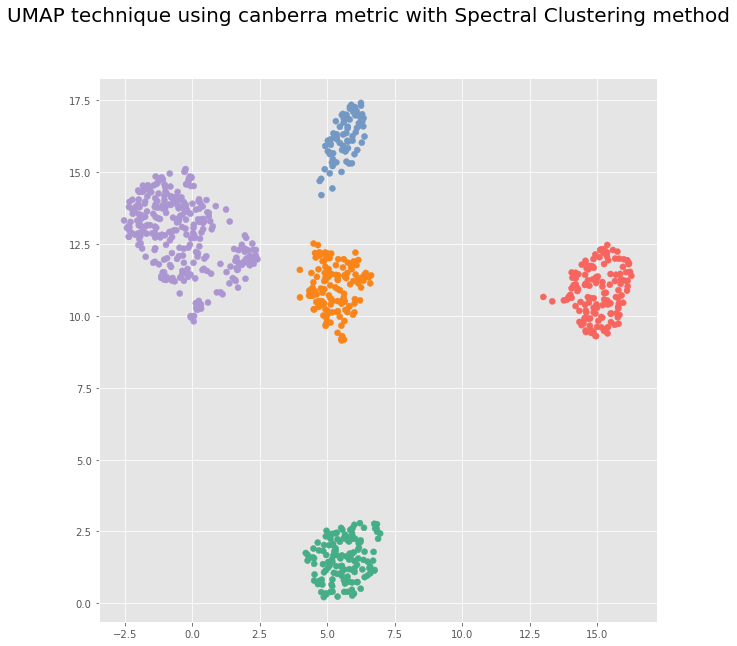

UMAP technique using canberra metric with Spectral Clustering method
0.9894925577596824


In [26]:
optimal_umap_canberra_spectral_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 0.3, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra_for_spectral_embedding = optimal_umap_canberra_spectral_fit.fit_transform(data_without_label)


optimal_umap_canberra_for_spectral_labels = SpectralClustering(n_clusters=5, 
                                 random_state=42).fit_predict(optimal_umap_canberra_for_spectral_embedding)

plot_cluster(optimal_umap_canberra_for_spectral_embedding[:, 0],
             optimal_umap_canberra_for_spectral_embedding[:, 1], 
             optimal_umap_canberra_for_spectral_labels, 
             'UMAP technique using canberra metric with Spectral Clustering method')
print("UMAP technique using canberra metric with Spectral Clustering method")
print(calculate_nmi_score(data, optimal_umap_canberra_for_spectral_labels))

### 1.3.2.7 Normalized Mutual Information Values Comparison

In [27]:
table = Texttable()

table.add_row(['Method','Normalized Mutual Information'])
table.add_row(["Agglomerative clustering", calculate_nmi_score(data, optimal_umap_canberra_agglomerative_labels)])
table.add_row(["Birch", calculate_nmi_score(data, optimal_umap_canberra_for_birch_labels)])
table.add_row(["Gaussian Mixture", calculate_nmi_score(data, optimal_umap_canberra_for_gaussian_labels)])
table.add_row(["K-Means", calculate_nmi_score(data, optimal_umap_canberra_for_k_means_labels)])
table.add_row(["Spectral Clustering", calculate_nmi_score(data, optimal_umap_canberra_for_spectral_labels)])

print(table.draw())

+--------------------------+-------------------------------+
| Method                   | Normalized Mutual Information |
+--------------------------+-------------------------------+
| Agglomerative clustering | 0.989                         |
+--------------------------+-------------------------------+
| Birch                    | 0.989                         |
+--------------------------+-------------------------------+
| Gaussian Mixture         | 0.989                         |
+--------------------------+-------------------------------+
| K-Means                  | 0.989                         |
+--------------------------+-------------------------------+
| Spectral Clustering      | 0.989                         |
+--------------------------+-------------------------------+


In [35]:
np.savetxt("q1.txt", 
           optimal_umap_canberra_for_k_means_labels, 
           fmt="%s",
           encoding = "utf-8")